<a href="https://colab.research.google.com/github/sidd-2203/Deep-Learning/blob/main/Tomato_Disease_Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=8

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Plant Village',
    shuffle='True',
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)

Found 4500 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [ ]:
#image is divided into batches of size of 32 so 141 batches
len(dataset)

141

In [ ]:
141*32  # and I have 4500 images in total


4512

(32, 256, 256, 3)
tf.Tensor([0 0 1 1 2 1 2 2 0 1 1 1 2 1 2 2 1 1 2 2 2 1 1 2 0 2 0 1 2 2 1 2], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([0 0 1 1 2 1 2 2 0 1 1 1 2 1 2 2 1 1 2 2 2 1 1 2 0 2 0 1 2 2 1 2], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([0 0 1 1 2 1 2 2 0 1 1 1 2 1 2 2 1 1 2 2 2 1 1 2 0 2 0 1 2 2 1 2], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([0 0 1 1 2 1 2 2 0 1 1 1 2 1 2 2 1 1 2 2 2 1 1 2 0 2 0 1 2 2 1 2], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([0 0 1 1 2 1 2 2 0 1 1 1 2 1 2 2 1 1 2 2 2 1 1 2 0 2 0 1 2 2 1 2], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([0 0 1 1 2 1 2 2 0 1 1 1 2 1 2 2 1 1 2 2 2 1 1 2 0 2 0 1 2 2 1 2], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([0 0 1 1 2 1 2 2 0 1 1 1 2 1 2 2 1 1 2 2 2 1 1 2 0 2 0 1 2 2 1 2], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([0 0 1 1 2 1 2 2 0 1 1 1 2 1 2 2 1 1 2 2 2 1 1 2 0 2 0 1 2 2 1 2], shape=(32,), dtype=int32)
(32, 256, 256, 3)
tf.Tensor([0 0

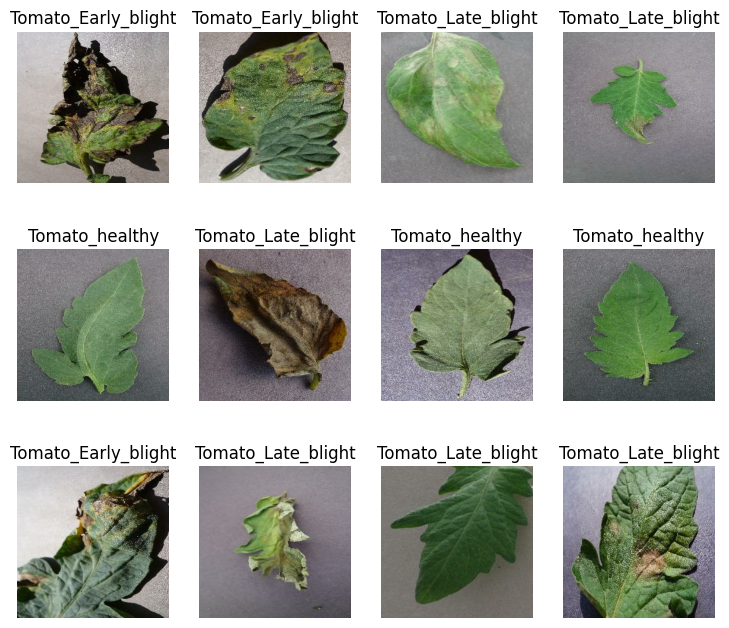

In [ ]:
plt.figure(figsize=(9,8))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    print(image_batch.shape)
    print(label_batch)
    plt.title(class_names[label_batch[i]])
    plt.axis('off')
    plt.imshow(image_batch[i].numpy().astype('uint8'))

In [ ]:
# 80% training
# 20% validation + test
# after every epoch use validation data to learn more


In [5]:
train_size=0.8
train_dataset_len=int(len(dataset)*train_size)
train_dataset=dataset.take(train_dataset_len)
test_dataset=dataset.skip(train_dataset_len)

In [ ]:
len(test_dataset)

29

In [ ]:
validation=0.5
val_dataset=test_dataset.take(14)
test_dataset=test_dataset.skip(14)

In [6]:
def get_dataset_partitions_df(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds.shuffle(shuffle_size,seed=12)
  train_size= int(train_split *ds_size)
  val_size=int(val_split *ds_size)
  train_ds=dataset.take(train_size)
  val_ds=dataset.skip(train_size).take(val_size)
  test_ds=dataset.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds

In [7]:
train_ds,val_ds,test_ds= get_dataset_partitions_df(dataset)

In [ ]:
len(train_ds)

112

In [8]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#need to scale the image pixel intensitites

In [9]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255.0),

])

In [10]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),

])

In [11]:
image_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

n_classes=3
# these layers are based on trial and error

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=image_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])

model.build(input_shape=image_shape)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
%%time
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/8
112/112 [==============================] - 357s 3s/step - loss: 0.8922 - accuracy: 0.5550 - val_loss: 0.5109 - val_accuracy: 0.8036
Epoch 2/8
112/112 [==============================] - 20s 170ms/step - loss: 0.5040 - accuracy: 0.7910 - val_loss: 0.6806 - val_accuracy: 0.7254
Epoch 3/8
112/112 [==============================] - 16s 136ms/step - loss: 0.3747 - accuracy: 0.8407 - val_loss: 0.7333 - val_accuracy: 0.7656
Epoch 4/8
112/112 [==============================] - 19s 170ms/step - loss: 0.3552 - accuracy: 0.8451 - val_loss: 0.6767 - val_accuracy: 0.7455
Epoch 5/8
112/112 [==============================] - 15s 134ms/step - loss: 0.2780 - accuracy: 0.8887 - val_loss: 0.6514 - val_accuracy: 0.8080
Epoch 6/8
112/112 [==============================] - 18s 156ms/step - loss: 0.2903 - accuracy: 0.8800 - val_loss: 0.3430 - val_accuracy: 0.8750
Epoch 7/8
112/112 [==============================] - 18s 161ms/step - loss: 0.3466 - accuracy: 0.8546 - val_loss: 0.2838 - val_accuracy: 0

In [15]:
scores=model.evaluate(test_ds)


15/15 [==============================] - 21s 975ms/step - loss: 0.5679 - accuracy: 0.8312


In [16]:
scores   #loss and accuracy

[0.567854642868042, 0.8311966061592102]

In [17]:
history

In [18]:
history.params

{'verbose': 1, 'epochs': 8, 'steps': 112}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']

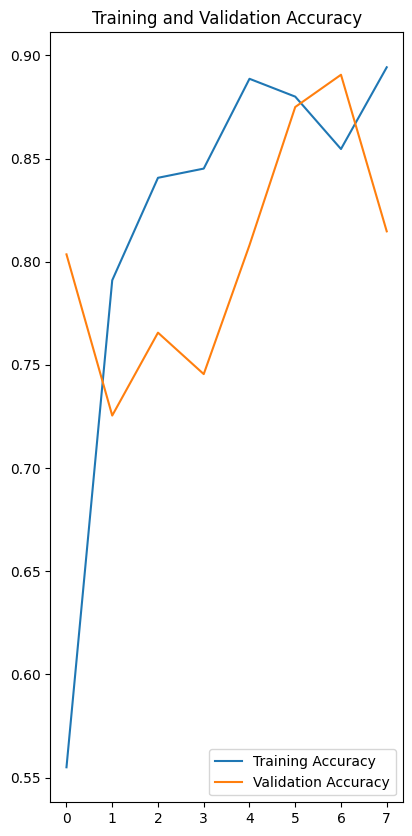

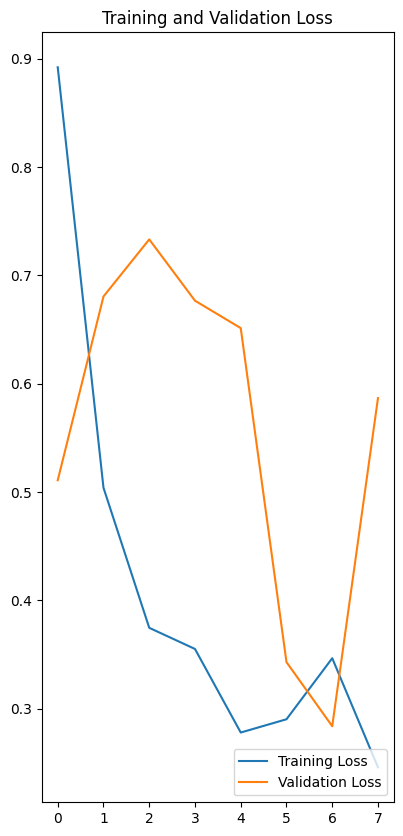

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

First image to show
Actual Label: Tomato_healthy 
1/1 [==============================] - 0s 369ms/step
predicted label: Tomato_healthy


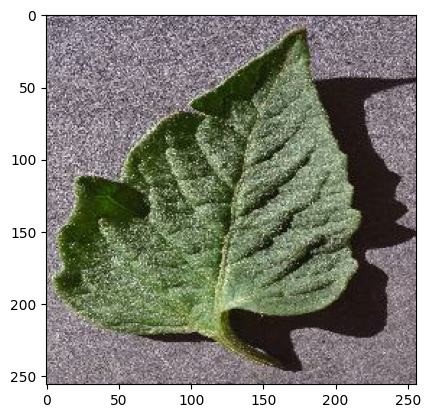

In [22]:
for images_batch,labels_batch in test_ds.take(1):
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()

  print("First image to show")
  plt.imshow(first_image)
  print(f'Actual Label: {class_names[first_label]} ')
  batch_prediction=model.predict(images_batch)

  print(f'predicted label: {class_names[np.argmax(batch_prediction[0])]}')

In [23]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)  #create a batch

  predictions=model.predict(img_array)
  predicted_class=class_names[np.argmax(predictions[0])]
  confidence =round(100*(np.max(predictions[0])))
  return predicted_class,confidence



1/1 [==============================] - 0s 19ms/step


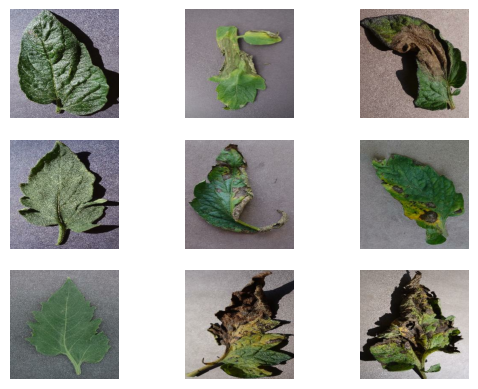

In [24]:
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]
    # plt.title(f'Actual Label: {actual_class}',f'\n Predicted Label: {predicted_class}.')
    plt.axis('off')

In [25]:
model_version=1
model.save('updated_model')

In [26]:
!zip -r /content/model.zip /content/updated_model

  adding: content/updated_model/ (stored 0%)
  adding: content/updated_model/variables/ (stored 0%)
  adding: content/updated_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/updated_model/variables/variables.index (deflated 68%)
  adding: content/updated_model/fingerprint.pb (stored 0%)
  adding: content/updated_model/keras_metadata.pb (deflated 94%)
  adding: content/updated_model/saved_model.pb (deflated 89%)
  adding: content/updated_model/assets/ (stored 0%)


In [27]:
from google.colab import files
files.download("/content/model.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>